# Final Project   - PHYS 640

## Abel Kebekabe  

The goal of this project is to solve the naviers stockes equations using the finte element method using a PDE package FEniCs. FEniCS is an automated programming environment for differential equations using Python. 

# Navier-Stokes Equations

### 1. Background

Most of every real situation in fluid flows is characterized by the Navier Stokes
equations that are the model of nonlinear partial differential equation. The Navier–Stokes equations for incompressible fluids with a velocity $u = (u,v,w)$ and pressure p in an incompressible fluid assuming a homogeneous, Newtonian fluid the Navier Stokes equation can be given by:

\begin{align}
  \frac{\partial u}{\partial t} -
  \mu \cdot \nabla ^{2} u + (u\cdot \nabla)u +\nabla\cdot p = f \\ 
\end{align}

\begin{align}
\nabla \cdot u = 0
\end{align}

where $f$ is a given force, $p$ is pressure and $\mu$ is dynamic viscocity. 

The above equations can be expanded to the form:

$${\displaystyle {\begin{aligned}\\\left({\frac {\partial u}{\partial t}}+u{\frac {\partial u}{\partial x}}+v{\frac {\partial u}{\partial y}}+w{\frac {\partial u}{\partial z}}\right)&=-{\frac {\partial p}{\partial x}}+\mu \left({\frac {\partial ^{2}u}{\partial x^{2}}}+{\frac {\partial ^{2}u}{\partial y^{2}}}+{\frac {\partial ^{2}u}{\partial z^{2}}}\right)+F_x\\\left
({\frac {\partial v}{\partial t}}+u{\frac {\partial v}{\partial x}}+v{\frac {\partial v}{\partial y}}+w{\frac {\partial v}{\partial z}}\right)&=-{\frac {\partial p}{\partial y}}+\mu \left({\frac {\partial ^{2}v}{\partial x^{2}}}+{\frac {\partial ^{2}v}{\partial y^{2}}}+{\frac {\partial ^{2}v}{\partial z^{2}}}\right)+F_y\\\left({\frac {\partial w}{\partial t}}+u{\frac {\partial w}{\partial x}}+v{\frac {\partial w}{\partial y}}+w{\frac {\partial w}{\partial z}}\right)&=-{\frac {\partial p}{\partial z}}+\mu \left({\frac {\partial ^{2}w}{\partial x^{2}}}+{\frac {\partial ^{2}w}{\partial y^{2}}}+{\frac {\partial ^{2}w}{\partial z^{2}}}\right)+F_z\end{aligned}}}$$

### 2. Mathematical Formulation

A finite element scheme can be used to solve the Navier stokes equation numerically. In order to solve a PDE using FEM, we need to first convert the PDE in to variational form. The basic recipe for turning a PDE into a variational problem is to multiply the PDE by a function v,integrate the resulting equation over the domain Ω,and perform integration by parts. 

Let superscript n denote a quantity at time tn, where n is an integer counting time levels. For example, un means u at time level n. We will use backward euler finite difference in order to discretizate time involving sampling the PDE at some time level, say tn+1:

\begin{equation}
\left({\partial u\over\partial t}\right)^{n+1}\approx {{u^{n+1} - u^n}\over{\Delta t}},
\end{equation}

Thus we can rewrite the navier stokes equation in the above form

\begin{align}
  {{u^{n+1} - u^n}\over{\Delta t}} -
  \mu \cdot \nabla ^{2} u^{n+1} + (u^{n+1} \cdot \nabla)u^{n+1} +\nabla\cdot p^{n+1} = f^{n+1} \\ 
\end{align}

\begin{align}
\nabla \cdot u^{n+1} = 0
\end{align}

We now take the dot product of a vector valued test function for velocity, v, and integrate over the domain:

\begin{align}
\int _{\Omega }\left( {{u^{n+1} - u^n}\over{\Delta t}} -
  \mu \cdot \nabla ^{2} u^{n+1} + (u^{n+1} \cdot \nabla)u^{n+1} +\nabla\cdot p^{n+1}\right)\cdot {v} \;dx=\int_{\Omega } f^{n+1} \cdot {v} \;dx
\end{align}

We can take advantage of the fact that the test function, ${\mathbf  {v}}$, evaluates to 0 along the boundary to transform two of the terms (pressure and velocity terms) into more manageable forms. 

\begin{align}
\int _{\Omega }\nabla p^{n+1}\cdot {v} \;dx=\int _{\Omega }{\frac {\partial p^{n+1}}{\partial x_{i}}}v_{i}\;dx=\left.p^{n+1}v_{i}\right|_{\partial \Omega }-\int _{\Omega }p^{n+1}{\frac {\partial v_{i}}{\partial x_{i}}}\;dx=0-\int _{\Omega }p^{n+1}\left(\nabla \cdot \mathbf {v} \right)\;dx
\end{align}

We then manipulate the vector Laplacian term into one involving only first derivatives: 

\begin{align}
\int _{\Omega }\nabla ^{2}{u}^{n+1} \cdot {v} \;dx=\int _{\Omega }{\frac {\partial ^{2}u_{i}^{n+1}}{\partial x_{j}^{2}}}v_{i}\;dx=\left.{\frac {\partial u_{i}^{n+1}}{\partial x_{j}}}v_{i}\right|_{\partial \Omega }-\int _{\Omega }{\frac {\partial u_{i}^{n+1}}{\partial x_{j}}}{\frac {\partial v_{i}}{\partial x_{j}}}\;dx=0-\int _{\Omega }\left(\nabla {u}^{n+1} \right)\nabla\left(\cdot {v} \right)\;dx
\end{align}

Plugging the above equations in to the navier stokes equation, we can obtain the following weak form of the solution:

\begin{align}
\int _{\Omega } {u \cdot v \over{\Delta t}} + \left( {u}^{n} \cdot \nabla {u}^{n+1} \right)\cdot {v} + \mu  \left(\nabla {u}^{n+1} \right)\cdot\left(\nabla {v} \right)-p\left(\nabla \cdot {v} \right)\;dx - \int _{\Omega } {u^{k} \cdot v \over{\Delta t}};dx=0 
\end{align}

We can rewrite the week form in the general form as shown below which we can implement using Fenics: 

For (u, p) ∈ W = V × P

\begin{align}
a((u,p),(v,q)) = \int _{\Omega } {u \cdot v \over{\Delta t}} + \left( {u}^{n} \cdot \nabla {u}^{n+1} \right)\cdot {v} + \mu  \left(\nabla {u}^{n+1} \right)\cdot\left(\nabla {v} \right)-p\left(\nabla \cdot {v} \right)\;dx 
\end{align}

\begin{align}
L(v,q) = \int _{\Omega } {u^{k} \cdot v \over{\Delta t}};dx=0
\end{align}

### 3. Implementation 

I. Installed FEniCS and Jupyter from conda-forge channel:

>>conda create -n fenicsproject -c conda-forge python=2.7 jupyter fenics

II. Activated fenicsproject:

>>source activate fenicsproject

III. Started a Jupyter notebook:

>>jupyter-notebook --ip=0.0.0.0

This opened up a notebook in my web browser and I clicked on New -> Python 2 and from there I could import fenics.

Solving a PDE in FEniCS consists of the following steps:

1. Identify the computational domain (Ω), the PDE, its boundary conditions, and source terms (f).
Reformulate the PDE as a finite element variational problem.
2. Write a Python program which defines the computational domain, the variational problem, the boundary conditions, and source terms, using the corresponding FEniCS abstractions.
3. Call FEniCS to solve the PDE and, optionally, extend the program to compute derived quantities such as fluxes and averages, and visualize the results.

In this project we will look at two classical fluid dynamics problems particularly the channel flow and a flow past a cylinder. 

###  Channel flow

Channel flow is pressure-induced flow (Poiseuille flow) in a long duct, usually a pipe. Specifically, it is assumed that there is  Laminar Flow (low reynolds number) of an incompressible Newtonian Fluid of viscosity η) induced by a constant positive pressure difference or pressure drop Δp in a pipe of length L and radius R<< L. It is highly studied and the analytical solution is known thus it is a good example to show. 

#### Operational Paramaters

For simplification, we set the density and viscocity to 1. We need to be carefull with time stepping as too large causes numerical instability and too small takes too long. We will take a time step of 0.02 in this problemt. 

In [1]:
from __future__ import print_function
from fenics import *
import numpy as np
T = 10.0           # final time
num_steps = 500    # number of time steps
dt = T / num_steps # time step size
t = 0
mu = 1             # kinematic viscosity
rho = 1            # density

### Mesh

-  Fine enough to see the solution
-  Coarse enough to run quickly

In [2]:
# Create mesh and define function spaces
mesh = UnitSquareMesh(16, 16)
V = VectorFunctionSpace(mesh, 'P', 2)
Q = FunctionSpace(mesh, 'P', 1)

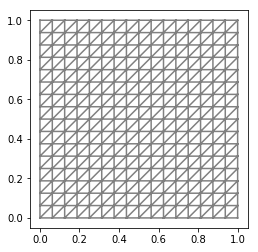

In [3]:
%matplotlib inline
plot(mesh)

#### Boundary conditions

-  No-slip on walls 
-  Inlet velocity - First, we will set u=0 at the walls of the channel; that is, at y=0 and y=1
-  Dirichlet velocity and pressure at outflow for simplicity
-  Pressure condition -  p=8 at x=0, p=0 at x=1 

In [3]:
# Define boundaries
inflow  = 'near(x[0], 0)'
outflow = 'near(x[0], 1)'
walls   = 'near(x[1], 0) || near(x[1], 1)'

# Define boundary conditions
bcu_noslip  = DirichletBC(V, Constant((0, 0)), walls)
bcp_inflow  = DirichletBC(Q, Constant(8), inflow)
bcp_outflow = DirichletBC(Q, Constant(0), outflow)
bcu = [bcu_noslip]
bcp = [bcp_inflow, bcp_outflow]

Now we will define function spaces, both trial (u) and test (v) function spaces. For our problem, we define two function spaces, one for the velocity and one for the pressure:

In [4]:
# Define trial and test functions
u = TrialFunction(V)
v = TestFunction(V)
p = TrialFunction(Q)
q = TestFunction(Q)

# Define functions for solutions at previous and current time steps
u_n = Function(V)
u_  = Function(V)
p_n = Function(Q)
p_  = Function(Q)

#### Week form formulation 

At this step we will apply the variation form we formulated before:

\begin{align}
a((u,p),(v,q)) = \int _{\Omega } {u \cdot v \over{\Delta t}} + \left( {u}^{n} \cdot \nabla {u}^{n+1} \right)\cdot {v} + \mu  \left(\nabla {u}^{n+1} \right)\cdot\left(\nabla {v} \right)-p\left(\nabla \cdot {v} \right)\;dx 
\end{align}

\begin{align}
L(v,q) = \int _{\Omega } {u^{k} \cdot v \over{\Delta t}};dx=0
\end{align}

In [5]:
# Define expressions used in variational forms
U   = 0.5*(u_n + u)
n   = FacetNormal(mesh)
f   = Constant((0, 0))
k   = Constant(dt)
mu  = Constant(mu)
rho = Constant(rho)

# Define strain-rate tensor
def epsilon(u):
    return sym(nabla_grad(u))

# Define stress tensor
def sigma(u, p):
    return 2*mu*epsilon(u) - p*Identity(len(u))

# Define variational problem for step 1
F1 = rho*dot((u - u_n) / k, v)*dx + \
     rho*dot(dot(u_n, nabla_grad(u_n)), v)*dx \
   + inner(sigma(U, p_n), epsilon(v))*dx \
   + dot(p_n*n, v)*ds - dot(mu*nabla_grad(U)*n, v)*ds \
   - dot(f, v)*dx
a1 = lhs(F1)
L1 = rhs(F1)

# Define variational problem for step 2
a2 = dot(nabla_grad(p), nabla_grad(q))*dx
L2 = dot(nabla_grad(p_n), nabla_grad(q))*dx - (1/k)*div(u_)*q*dx

# Define variational problem for step 3
a3 = dot(u, v)*dx
L3 = dot(u_, v)*dx - k*dot(nabla_grad(p_ - p_n), v)*dx

# Assemble matrices
A1 = assemble(a1)
A2 = assemble(a2)
A3 = assemble(a3)

# Apply boundary conditions to matrices
[bc.apply(A1) for bc in bcu]
[bc.apply(A2) for bc in bcp]

[None, None]

#### Time stepping and Error calculation

In [ ]:
# Create XDMF files for visualization output
xdmffile_u = XDMFFile('navier_stokes/velocity.xdmf')
xdmffile_p = XDMFFile('navier_stokes/pressure.xdmf')

# Time-stepping
for n in range(num_steps):

    # Update current time
    t += dt

    # Step 1: Tentative velocity step
    b1 = assemble(L1)
    [bc.apply(b1) for bc in bcu]
    solve(A1, u_.vector(), b1)

    # Step 2: Pressure correction step
    b2 = assemble(L2)
    [bc.apply(b2) for bc in bcp]
    solve(A2, p_.vector(), b2)

    # Step 3: Velocity correction step
    b3 = assemble(L3)
    solve(A3, u_.vector(), b3)

    # Plot solution
    plot(u_)

    # Compute error
    u_e = Expression(('4*x[1]*(1.0 - x[1])', '0'), degree=2)
    u_e = interpolate(u_e, V)
    error = np.abs(u_e.vector().array() - u_.vector().array()).max()
    print('t = %.2f: error = %.3g' % (t, error))
    print('max u:', u_.vector().array().max())
    
     # Plot solution
    plot(u_, title='Velocity')
    plot(p_, title='Pressure')
    
    xdmffile_u.write(u_, t)
    xdmffile_p.write(p_, t)

    # Update previous solution
    u_n.assign(u_)
    p_n.assign(p_)

#### Results 

Below velocity vector, velocity distribution countour and pressure countour plots are presented. 

Using matplotlib backend: MacOSX


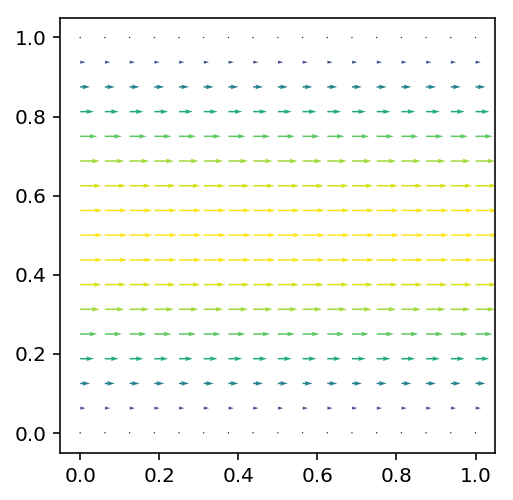

In [29]:
import matplotlib.pyplot as plt
%matplotlib
plot(u_)
plt.show()

Fig1. Vector plot of velocity Distribution for channel flow 

In [50]:
from IPython.display import HTML
HTML(X3DOM().html(u_))

Fig 2. Velocity Distribution for channel flow

Fenics is not that great with post processing, thus, we use the third party vizualization tool, ParaView, in order to be able to postprocess and vizualize the computed solution better. We store the solution to a pvd file in the code. 

![alt text](velocity_vec.png "Title")

Fig3. Vector plot of velocity Distribution for channel flow as rendered in paraview 

Text(0,0.5,'Y')

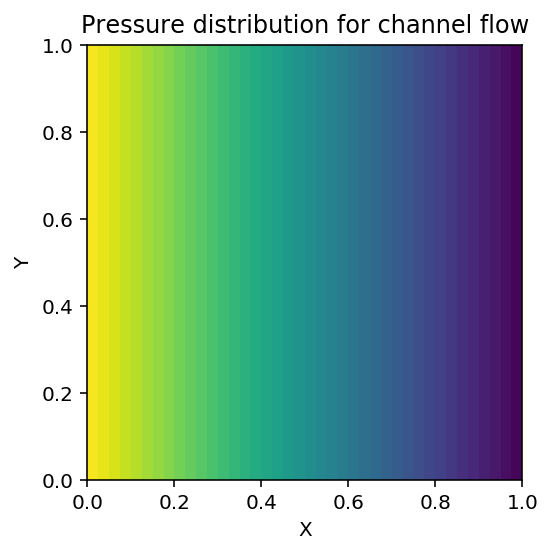

In [41]:
plot(p_) 
plt.title('Pressure distribution for channel flow')
plt.xlabel('X')
plt.ylabel('Y') 

Fig 3. Pressure Distribution for channel flow

#### Discussion 

Figure 1. and Figure 2. shows the velocity profile at the final time for the channel flow. From the analytical solution we know that a channel frow has a parabolic profile and our result shows that. We can see that the fluid velocity in the pipe walls is zero and reaches its maximum at the pipe center. Because of the no-slip condition, the fluid particles in the layer in contact with the surface of the pipe come to a complete stop. This layer also causes the fluid particles in the adjacent layers to slow down gradually as a result of friction. To make up for this velocity reduction, the velocity of the fluid at the mid section of the pipe has to increase to keep the mass flow rate through the pipe constant. As a result, a velocity gradient develops along the pipe. 

### 3.2 Flow Past A Cylindrer

#### Geometry and flow configuration

For this problem, we concider a pipe in the domain Ω=[0,2.2]×[0,0.41] with a circle of radius r = 0.05 at (0.2,0.2) was concidered. The example problem set up was taken from DFG benchmark suite. 

-  For the lower and upper walls no slip boundary condtions. 
-  At the Inlet velocity parabolic veloicty profile is defined:
\begin{align}
u(x, y, t) = \left(1.5 \cdot \frac{4y(0.41 - y)}{0.41^2}, 0\right)
\end{align}

-  which has the velocity reaching maximum magnitude of 1.5 at y=0.41/2
-  All other pressure condtions are similar to the channel flow

Given below is the fenics implementation of a flow past a cyliner. The code is mostly similar to the previous case except the boundary condtion and time stepping. 

In [27]:
from fenics import *
from mshr import *
import numpy as np

T = 5.0            # final time
num_steps = 5000   # number of time steps
dt = T / num_steps # time step size
mu = 0.001         # dynamic viscosity
rho = 1            # density

In [28]:
# Create mesh
channel = Rectangle(Point(0, 0), Point(2.2, 0.41))
cylinder = Circle(Point(0.2, 0.2), 0.05)
domain = channel - cylinder
mesh = generate_mesh(domain, 32)

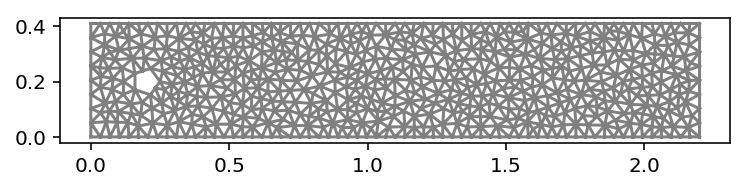

In [29]:
plot(mesh)

In [ ]:
# Define function spaces
V = VectorFunctionSpace(mesh, 'P', 2)
Q = FunctionSpace(mesh, 'P', 1)

# Define boundaries
inflow   = 'near(x[0], 0)'
outflow  = 'near(x[0], 2.2)'
walls    = 'near(x[1], 0) || near(x[1], 0.41)'
cylinder = 'on_boundary && x[0]>0.1 && x[0]<0.3 && x[1]>0.1 && x[1]<0.3'

# Define inflow profile
inflow_profile = ('4.0*1.5*x[1]*(0.41 - x[1]) / pow(0.41, 2)', '0')

# Define boundary conditions
bcu_inflow = DirichletBC(V, Expression(inflow_profile, degree=2), inflow)
bcu_walls = DirichletBC(V, Constant((0, 0)), walls)
bcu_cylinder = DirichletBC(V, Constant((0, 0)), cylinder)
bcp_outflow = DirichletBC(Q, Constant(0), outflow)
bcu = [bcu_inflow, bcu_walls, bcu_cylinder]
bcp = [bcp_outflow]

# Define trial and test functions
u = TrialFunction(V)
v = TestFunction(V)
p = TrialFunction(Q)
q = TestFunction(Q)

# Define functions for solutions at previous and current time steps
u_n = Function(V)
u_  = Function(V)
p_n = Function(Q)
p_  = Function(Q)

# Define expressions used in variational forms
U  = 0.5*(u_n + u)
n  = FacetNormal(mesh)
f  = Constant((0, 0))
k  = Constant(dt)
mu = Constant(mu)
rho = Constant(rho)

# Define symmetric gradient
def epsilon(u):
    return sym(nabla_grad(u))

# Define stress tensor
def sigma(u, p):
    return 2*mu*epsilon(u) - p*Identity(len(u))

# Define variational problem for step 1
F1 = rho*dot((u - u_n) / k, v)*dx + rho*dot(dot(u_n, nabla_grad(u_n)), v)*dx + inner(sigma(U, p_n), epsilon(v))*dx + dot(p_n*n, v)*ds - dot(mu*nabla_grad(U)*n, v)*ds - dot(f, v)*dx
a1 = lhs(F1)
L1 = rhs(F1)

# Define variational problem for step 2
a2 = dot(nabla_grad(p), nabla_grad(q))*dx
L2 = dot(nabla_grad(p_n), nabla_grad(q))*dx - (1/k)*div(u_)*q*dx

# Define variational problem for step 3
a3 = dot(u, v)*dx
L3 = dot(u_, v)*dx - k*dot(nabla_grad(p_ - p_n), v)*dx

# Assemble matrices
A1 = assemble(a1)
A2 = assemble(a2)
A3 = assemble(a3)

# Apply boundary conditions to matrices
[bc.apply(A1) for bc in bcu]
[bc.apply(A2) for bc in bcp]

# Create XDMF files for visualization output
xdmffile_u = XDMFFile('navier_stokes_cylinder/velocity.xdmf')
xdmffile_p = XDMFFile('navier_stokes_cylinder/pressure.xdmf')

# Create time series (for use in reaction_system.py)
timeseries_u = TimeSeries('navier_stokes_cylinder/velocity_series')
timeseries_p = TimeSeries('navier_stokes_cylinder/pressure_series')

# Save mesh to file (for use in reaction_system.py)
File('navier_stokes_cylinder/cylinder.xml.gz') << mesh

# Time-stepping
t = 0
for n in range(num_steps):

    # Update current time
    t += dt

    # Step 1: Tentative velocity step
    b1 = assemble(L1)
    [bc.apply(b1) for bc in bcu]
    solve(A1, u_.vector(), b1, 'bicgstab', 'hypre_amg')

    # Step 2: Pressure correction step
    b2 = assemble(L2)
    [bc.apply(b2) for bc in bcp]
    solve(A2, p_.vector(), b2, 'bicgstab', 'hypre_amg')

    # Step 3: Velocity correction step
    b3 = assemble(L3)
    solve(A3, u_.vector(), b3, 'cg', 'sor')

    # Plot solution
    plot(u_, title='Velocity')
    plot(p_, title='Pressure')
    
    # Save solution to file (XDMF/HDF5)
    xdmffile_u.write(u_, t)
    xdmffile_p.write(p_, t)

    # Save nodal values to file
    timeseries_u.store(u_.vector(), t)
    timeseries_p.store(p_.vector(), t)

    # Update previous solution
    u_n.assign(u_)
    p_n.assign(p_)

    # Update progress bar
    progress.update(t / T)
    print('u max:', u_.vector().array().max())

#### Results 

The above code is computationaly heavy and takes very long to excute. Roughly about 4 hours on an 8 GM ram computer. After trying with diffrent timestepping, I observed that we need at least 10 time steps per cycle. Too large of a time step suppresses shedding, too large causes numerical instability (the solution blows up), too small takes too long to excute. The velocity past the cylinder is given below:

![](files/cylinder.png)

Fig 4. Velocity distribution of a flow past a cylinder rendered using Paraview 

#### Discussion 

The figure shows the velocity distribution over a circular cylinder. The incoming flow is uniform at the freestream conditions. The flow smoothly divides and reunites around the cylinder. This is because the flow is a very low reynolds number flow (laminar). The vortex shedding past the cylinder is periodic and the flows are seen to be practically symmetric. At the leading edge of the cylinder a stagnation point is formed where the oncoming flow is brought to rest. The pressure here is equal to the stagnation pressure. To either side of the stagnation point the flow accelerates around the forward surface of the cylinder producing a drop in the pressure. Immediately adjacent to the cylinder surface a thin boundary layer is formed. The boundary layer is a region where the velocity drops rapidly to zero to satisfy the no slip condition at the cylinder surface. The direct effects of viscosity are felt only within the boundary layer. Separation occurs because the boundary layer anticipates the deceleration of the flow. Downstream the flow separation reunites and becomes periodic. 

### 4. Conclustion 

In this project, a finte element method was used to solve the naviers stokes equation using the package Fenics for the channel flow and a flow past a cylinder. I was able to observe that the solution to naviers stokes equation is highly unstable, that it is highly dependent on intial value and time stepping ,and that it is computationaly expensive (time). 

# Reference
[1] FEniCS. Fenics project. http://www.fenicsproject.org

[2] http://www.featflow.de/en/benchmarks/cfdbenchmarking/flow/dfg_benchmark2_re100.html